# Data Wrangling

## Gather

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import requests
import json
import tweepy
import os

In [2]:
# read twitter archive file
twitter_archive = pd.read_csv('C:/Users/Administrator/Documents/ALX-T Nano degree/project-wrangle-and-analyze-data/data/twitter-archive-enhanced.csv')

In [3]:
# programmatically download image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# check data type in reponse
type(response.content)

bytes

In [5]:
# save response to file, in binary mode
with open('C:/Users/Administrator/Documents/ALX-T Nano degree/project-wrangle-and-analyze-data/data/image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [6]:
# load data into dataframe
image_predictions = pd.read_csv('C:/Users/Administrator/Documents/ALX-T Nano degree/project-wrangle-and-analyze-data/data/image_predictions.tsv', sep = '\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

In [8]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following Twitter API code was sent to this student from a Udacity instructor

In [9]:
 # Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#from tweepy import OAuthHandler
#from timeit import default_timer as timer

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

#count = 0 
#fails_dict = {}
#start = timer() 

# with open('C:/Users/Administrator/Documents/ALX-T Nano degree/project-wrangle-and-analyze-data/data/tweet_json.txt', 'w') as outfile:
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.errors.TweepyException as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [11]:
# read tweet-json.txt file 
tweets = []
for data in open('C:/Users/Administrator/Documents/ALX-T Nano degree/project-wrangle-and-analyze-data/data/tweet-json.txt', 'r'):
    tweets.append(json.loads(data))

In [12]:
# create dataframe from tweets with tweet_id, retweet_count, favorite_count columns
tweet_list = []

for tweet in tweets:
    tweet_list.append({'tweet_id':tweet['id'],
                       'retweets':tweet['retweet_count'],
                       'favorites':tweet['favorite_count']})
tweet_detail = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorites', 'retweets'] )

In [13]:
# view dataframe
tweet_detail       

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


## Assess

#### Visual Assessment
Display each table in its entirety by displaying the pandas DataFrame that it was gathered into for visual assessment

In [14]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
tweet_detail

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


#### Programmatic Assessment

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1414,698710712454139905,NaN,NaN,2016-02-14 03:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cuddles. He's not entirely sure how do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698710712...,10,10,Cuddles,None,None,None,None
744,780192070812196864,NaN,NaN,2016-09-25 23:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780192070...,11,10,None,None,None,None,None
1660,683078886620553216,NaN,NaN,2016-01-02 00:14:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a nifty leaping pupper. Feet look ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683078886...,9,10,None,None,None,pupper,None
2182,668992363537309700,NaN,NaN,2015-11-24 03:19:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harrison. He braves the snow like a ch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668992363...,8,10,Harrison,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None


In [18]:
sum(twitter_archive.duplicated())

0

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
413,673956914389192708,https://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg,1,pug,0.586161,True,Brabancon_griffon,0.082744,True,Chihuahua,0.045878,True
1081,718246886998687744,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,1,Chihuahua,0.354488,True,carton,0.159672,False,Siberian_husky,0.057498,True
1495,783347506784731136,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,0.012601,False,coyote,0.000057,False
1625,803773340896923648,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True


In [21]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [22]:
sum(image_predictions.duplicated())

0

In [23]:
tweet_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
tweet_detail.sample(5)

,tweet_id,favorites,retweets
1375,701601587219795968,2299,523
2213,668542336805281792,497,231
831,768554158521745409,0,6719
1953,673636718965334016,1194,404
1062,740995100998766593,7018,3154


In [25]:
tweet_detail.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [26]:
sum(tweet_detail.duplicated())

0

In [27]:
tweet_detail[tweet_detail['retweets'] == 0]

,tweet_id,favorites,retweets
290,838085839343206401,150,0


In [28]:
tweet_detail[tweet_detail['favorites'] == 0]

,tweet_id,favorites,retweets
31,886054160059072513,0,108
35,885311592912609280,0,19297
67,879130579576475649,0,7181
72,878404777348136964,0,1349
73,878316110768087041,0,6965
...,...,...,...
1021,746521445350707200,0,1110
1041,743835915802583040,0,2387
1240,711998809858043904,0,138
2257,667550904950915073,0,37


### Quality 

**twitter_archive table**
- missing values `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`
- irrelevant columns (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`)
- incorrect data in `name` column ('None', 'a')
- url string in `source`
- no dog stage for some dogs
- erroneous data types(`timestamp`)
- some tweets do not have images
- some tweets are retweets
- some tweets have multiple dog stages

**image_predictions table**
- not all values in `p1`, `p2`, and `p3` are dog breeds
- lower case and upper case sometimes in `p1`, `p2`, amd `p3`


**tweet_detail table**
- missing records (2354 instead of 2356)

### Tidiness

**twitter_archive table**
- `doggo`, `floofer`, `pupper`, `puppo` should be observations in one column `dog_stage`


**image_predictions table**
- multiple columns each for predictions, confidence level, and breed
- `tweet_id` should be present in `twitter_archive` table 


**tweet_detail table**
- `favorites`, and `retweets` should be added to the twitter_archive table
- `tweet_id` should be present in `twitter_archive` table 

## Clean 

In [29]:
# create copy of each dataframe
twitter_archive_clean = twitter_archive.copy()
img_prediction_clean = image_predictions.copy()
tweet_detail_clean = tweet_detail.copy()

**missing values `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`and Irrelevant columns (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`) since both issues can be sorted together**

#### Define
- remove columns using .drop() 

#### Code

In [30]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1)

#### Test

In [31]:
twitter_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


**`doggo`, `floofer`, `pupper`, `puppo` should be observations in one column `stage`**

**Define**
- replace 'None' with empty string
- create new column `stage` and populate by concatenating `doggo`, `floofer`, `pupper`, `puppo`
- delete `doggo`, `floofer`, `pupper`, `puppo`

**Code**

In [32]:
# convert 'None' to empty string ""
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)

In [33]:
# populating new column 'stage' by concatenating 
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [34]:
# delete doggo, pupper, puppa, and floofer columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'pupper', 'puppo', 'floofer'], axis = 1)

**Test**

In [35]:
twitter_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,
...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,


**`favorites`, and `retweets` should be added to the twitter_archive table**

**Define**
- Merge `twitter_archive_clean` with `tweet_detail` table

**Code**

In [36]:
# merge dataframes
complete_archive = pd.merge(twitter_archive_clean, tweet_detail, how = 'outer', on = 'tweet_id')

**Test**

In [37]:
complete_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   rating_numerator    2356 non-null   int64  
 5   rating_denominator  2356 non-null   int64  
 6   name                2356 non-null   object 
 7   stage               2356 non-null   object 
 8   favorites           2354 non-null   float64
 9   retweets            2354 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 202.5+ KB


**Missing records (2354 instead of 2356)**

**NB: These missing records are included in `complete_archive` table**

**Define**
- View missing records
- Impute or delete missing data

In [38]:
# view missing records
complete_archive[complete_archive['favorites'].isnull()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorites,retweets
19,888202515573088257,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,13,10,Canela,,NaN,NaN
815,771004394259247104,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,12,10,None,pupper,NaN,NaN


In [39]:
# NaN Values are retweets, not original tweets

In [40]:
# delete missing records
index_val = complete_archive[complete_archive['favorites'].isnull()].index
complete_archive.drop(index_val, inplace = True)

**Test**

In [41]:
complete_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2354 non-null   int64  
 1   timestamp           2354 non-null   object 
 2   source              2354 non-null   object 
 3   text                2354 non-null   object 
 4   rating_numerator    2354 non-null   int64  
 5   rating_denominator  2354 non-null   int64  
 6   name                2354 non-null   object 
 7   stage               2354 non-null   object 
 8   favorites           2354 non-null   float64
 9   retweets            2354 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 202.3+ KB


**Three columns represented as `p1`, `p2`, `p3`, `p1_conf`, `p2_conf`, `p3_conf`, `p1_dog`, `p2_dog`, `p3_dog`**

**Define**
- Filter predictions where `p1` is False and `p2` is True, and `p1` and `p2` is False but `p3` is True
- Replace `p1`, `p1_conf`, `p1_dog` with True values from the filtered dataset
- Replace `image_predictions` with rows from step 2
- drop `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog` columns
- rename `p1`, `p1_conf`, `p1_dog`

In [42]:
# filter predictions where p1 is False and p2 is True, and p1 and p2 is False but p3 is True
p1_False = img_prediction_clean[img_prediction_clean['p1_dog'] == False]
p2_True = p1_False[p1_False['p2_dog']==True]
p3_True = img_prediction_clean[(img_prediction_clean['p1_dog'] == False) & (img_prediction_clean['p2_dog'] == False) & (img_prediction_clean['p3_dog'] == True)]

In [43]:
# replace p1, p1_conf, p1_dog false values with True values from the filtered dataset
p2_True['p1'] = p2_True['p2']
p2_True['p1_conf'] = p2_True['p2_conf']
p2_True['p1_dog'] = p2_True['p2_dog']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10064\3016296876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_True['p1'] = p2_True['p2']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10064\3016296876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_True['p1_conf'] = p2_True['p2_conf']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10064\3016296876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [44]:
p3_True['p1'] = p3_True['p3']
p3_True['p1_conf'] = p3_True['p3_conf']
p3_True['p1_dog'] = p3_True['p3_dog']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10064\1426631365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3_True['p1'] = p3_True['p3']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10064\1426631365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3_True['p1_conf'] = p3_True['p3_conf']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10064\1426631365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [45]:
# replace image_predictions with rows from step 2
img_prediction_clean.loc[p2_True.index, :] = p2_True[:]
img_prediction_clean.loc[p3_True.index, :] = p3_True[:]

In [46]:
# drop p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns
img_prediction_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

In [47]:
img_prediction_clean = img_prediction_clean.rename(columns = {'p1':'breed', 'p1_conf':'confidence_lvl', 'p1_dog':'prediction'})

**Test**

In [48]:
img_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2075 non-null   int64  
 1   jpg_url         2075 non-null   object 
 2   img_num         2075 non-null   int64  
 3   breed           2075 non-null   object 
 4   confidence_lvl  2075 non-null   float64
 5   prediction      2075 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


**image_prediction's `tweet_id` should be present in `twitter_archive` table**

**Define**
- merge `img_prediction_clean` with `complete_archive` 

**Code**

In [49]:
archive_with_img = pd.merge(complete_archive, img_prediction_clean, how = 'outer', on  = 'tweet_id')

**Test**

In [50]:
archive_with_img

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorites,retweets,jpg_url,img_num,breed,confidence_lvl,prediction
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,True
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9.0,10.0,a,,128.0,47.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True
2352,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7.0,10.0,a,,132.0,48.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True
2353,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,None,,2535.0,532.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True
2354,771004394259247104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1.0,home_theater,0.414338,False


**Some tweets are retweets**

**Define**
- Filter for tweets that begin with 'RT' and delete

**Code**

In [51]:
index_rt = archive_with_img[archive_with_img['text'].str.match(r'(^RT.*)') == True].index
archive_with_img.drop(index_rt, inplace = True)

In [52]:
# reset_index
archive_with_img = archive_with_img.reset_index(drop=True)

**Test**

In [53]:
archive_with_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2173 non-null   object 
 2   source              2173 non-null   object 
 3   text                2173 non-null   object 
 4   rating_numerator    2173 non-null   float64
 5   rating_denominator  2173 non-null   float64
 6   name                2173 non-null   object 
 7   stage               2173 non-null   object 
 8   favorites           2173 non-null   float64
 9   retweets            2173 non-null   float64
 10  jpg_url             1995 non-null   object 
 11  img_num             1995 non-null   float64
 12  breed               1995 non-null   object 
 13  confidence_lvl      1995 non-null   float64
 14  prediction          1995 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 255.0+

**Some tweets do not have images**

**Define**
- drop rows with null values in `img_num`

**Code**

In [54]:
index_names = archive_with_img[archive_with_img['img_num'].isnull()].index
archive_with_img.drop(index_names, inplace = True)

**Test**

In [55]:
archive_with_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 2174
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1995 non-null   int64  
 1   timestamp           1993 non-null   object 
 2   source              1993 non-null   object 
 3   text                1993 non-null   object 
 4   rating_numerator    1993 non-null   float64
 5   rating_denominator  1993 non-null   float64
 6   name                1993 non-null   object 
 7   stage               1993 non-null   object 
 8   favorites           1993 non-null   float64
 9   retweets            1993 non-null   float64
 10  jpg_url             1995 non-null   object 
 11  img_num             1995 non-null   float64
 12  breed               1995 non-null   object 
 13  confidence_lvl      1995 non-null   float64
 14  prediction          1995 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 249.4+

**Erroneous data types(`timestamp`, `retweets`, `favorites`, `img_num`, `rating_numerator`, `rating_denominator`)**

**Define**
- convert `timestamp` to datetime
- convert `retweets`, `favorites`, `img_num`, `rating_numerator`, `rating_denominator` to integers

**Code**

In [56]:
# drop Nan values
archive_with_img = archive_with_img.dropna()

In [57]:
# convert datatypes
archive_with_img['timestamp'] = pd.to_datetime(archive_with_img['timestamp'])
archive_with_img['retweets'] = archive_with_img['retweets'].astype('int')
archive_with_img['favorites'] = archive_with_img['favorites'].astype('int')
archive_with_img['img_num'] = archive_with_img['img_num'].astype('int')
archive_with_img['rating_numerator'] = archive_with_img['rating_numerator'].astype('int')
archive_with_img['rating_denominator'] = archive_with_img['rating_denominator'].astype('int')

**Test**

In [58]:
archive_with_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2172
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1993 non-null   int64              
 1   timestamp           1993 non-null   datetime64[ns, UTC]
 2   source              1993 non-null   object             
 3   text                1993 non-null   object             
 4   rating_numerator    1993 non-null   int32              
 5   rating_denominator  1993 non-null   int32              
 6   name                1993 non-null   object             
 7   stage               1993 non-null   object             
 8   favorites           1993 non-null   int32              
 9   retweets            1993 non-null   int32              
 10  jpg_url             1993 non-null   object             
 11  img_num             1993 non-null   int32              
 12  breed               1993 non-null 

**Lower case and upper case sometimes in `p1`, `p2`, and `p3`. i.e., `breed`**

**Define**
- convert `breed` to lower case

**Code**

In [59]:
archive_with_img['breed'] = archive_with_img['breed'].str.lower()

**Test**

In [60]:
archive_with_img

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorites,retweets,jpg_url,img_num,breed,confidence_lvl,prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,0.168086,True
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,,111,41,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True
2169,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,,311,147,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True
2170,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,,128,47,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True
2171,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,,132,48,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True


**Not all values in `p1`, `p2`, and `p3`. i.e. `breed` are dog breeds**

**Define**
- drop rows where `prediction` is False

**Code**

In [61]:
false_breed_index = archive_with_img[archive_with_img['prediction'] == False].index
archive_with_img.drop(false_breed_index, inplace = True)

In [62]:
# reset index
archive_clean = archive_with_img.reset_index(drop = True)

**Test**

In [63]:
archive_clean[archive_clean['prediction'] == False]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorites,retweets,jpg_url,img_num,breed,confidence_lvl,prediction


**Incorrect data in `name` ('None', 'a')**

**Define**
- replace 'None' and 'a' with ''
- replace '' with null value

**Code**

In [64]:
# replace'None' and 'a'
archive_clean['name'].replace('None', '', inplace=True)
archive_clean['name'].replace('a', '', inplace=True)

In [65]:
# convert to  null
archive_clean['name'] = archive_clean['name'].replace(r'^\s*$', np.nan, regex=True)

**Test**

In [66]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1685 non-null   int64              
 1   timestamp           1685 non-null   datetime64[ns, UTC]
 2   source              1685 non-null   object             
 3   text                1685 non-null   object             
 4   rating_numerator    1685 non-null   int32              
 5   rating_denominator  1685 non-null   int32              
 6   name                1221 non-null   object             
 7   stage               1685 non-null   object             
 8   favorites           1685 non-null   int32              
 9   retweets            1685 non-null   int32              
 10  jpg_url             1685 non-null   object             
 11  img_num             1685 non-null   int32              
 12  breed               1685 non-null 

**url string in `source`**

**Define**
- view distinct values in `source`
- extract distinct name from url 

**Code**

In [67]:
# view distinct values
archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1654
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [68]:
# extract distinct values
archive_clean['source'] = archive_clean['source'].str.extract('(iPhone|Web|TweetDeck)', expand= True)

**Test**

In [69]:
archive_clean['source'].value_counts()

iPhone       1654
Web            22
TweetDeck       9
Name: source, dtype: int64

**some tweets have multiple dog stages**

**NB:** some tweets describe two dogs.

**Define**
- replace tweets describing 1 dog with appropriate dog stage
- add a separator ',' in tweets describing 2 dogs

In [70]:
# view tweets with multiple dpg stages
multiple_stages = archive_clean[archive_clean['stage'].isin(['doggopupper', 'doggopuppo', 'doggofloofer'])]
multiple_stages

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorites,retweets,jpg_url,img_num,breed,confidence_lvl,prediction
134,855851453814013952,2017-04-22 18:31:02+00:00,iPhone,Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggopuppo,47844,19196,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True
140,854010172552949760,2017-04-17 16:34:26+00:00,iPhone,"At first I thought this was a shy doggo, but i...",11,10,NaN,doggofloofer,17169,3433,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,english_springer,0.354733,True
306,817777686764523521,2017-01-07 16:59:28+00:00,iPhone,"This is Dido. She's playing the lead role in ""...",13,10,Dido,doggopupper,11901,3084,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1,curly-coated_retriever,0.733256,True
360,808106460588765185,2016-12-12 00:29:28+00:00,iPhone,Here we have Burke (pupper) and Dexter (doggo)...,12,10,NaN,doggopupper,9701,2525,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True
378,802265048156610565,2016-11-25 21:37:47+00:00,iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",11,10,NaN,doggopupper,7039,1573,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1,labrador_retriever,0.897162,True
383,801115127852503040,2016-11-22 17:28:25+00:00,iPhone,This is Bones. He's being haunted by another d...,12,10,Bones,doggopupper,8992,2429,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True
583,759793422261743616,2016-07-31 16:50:42+00:00,iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,doggopupper,6620,2173,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True
629,751583847268179968,2016-07-09 01:08:47+00:00,iPhone,Please stop sending it pictures that don't eve...,5,10,NaN,doggopupper,4849,1265,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True
706,741067306818797568,2016-06-10 00:39:48+00:00,iPhone,This is just downright precious af. 12/10 for ...,12,10,just,doggopupper,10342,3520,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True
747,733109485275860992,2016-05-19 01:38:16+00:00,iPhone,"Like father (doggo), like son (pupper). Both 1...",12,10,NaN,doggopupper,44619,17621,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True


In [71]:
# using the text and image describing each tweet 
list(multiple_stages['text'])

["Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel",
 "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",
 'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
 'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze',
 "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
 'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time htt

In [72]:
# replace tweets with appropriate dog stage
archive_clean.loc[134,'stage'] = 'puppo'
archive_clean.loc[140,'stage'] = 'doggo'
archive_clean.loc[306,'stage'] = 'pupper'
archive_clean.loc[360,'stage'] = 'doggo, pupper'
archive_clean.loc[378,'stage'] = 'doggo, pupper'
archive_clean.loc[383,'stage'] = 'pupper'
archive_clean.loc[583,'stage'] = 'doggo, pupper'
archive_clean.loc[629,'stage'] = 'doggo'
archive_clean.loc[706,'stage'] = 'doggo, pupper'
archive_clean.loc[747,'stage'] = 'doggo, pupper'

**Test**

In [73]:
archive_clean[archive_clean['stage'].isin(['doggopupper', 'doggopuppo', 'doggofloofer'])]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorites,retweets,jpg_url,img_num,breed,confidence_lvl,prediction


**Null values represented as 'None' in stage**

**Define**
- convert '' to null value

**Code**

In [74]:
archive_clean['stage'] = archive_clean['stage'].replace(r'^\s*$', np.nan, regex=True)

**Test**

In [75]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1685 non-null   int64              
 1   timestamp           1685 non-null   datetime64[ns, UTC]
 2   source              1685 non-null   object             
 3   text                1685 non-null   object             
 4   rating_numerator    1685 non-null   int32              
 5   rating_denominator  1685 non-null   int32              
 6   name                1221 non-null   object             
 7   stage               260 non-null    object             
 8   favorites           1685 non-null   int32              
 9   retweets            1685 non-null   int32              
 10  jpg_url             1685 non-null   object             
 11  img_num             1685 non-null   int32              
 12  breed               1685 non-null 

In [76]:
# save dataset to csv
archive_clean.to_csv('C:/Users/Administrator/Documents/ALX-T Nano degree/project-wrangle-and-analyze-data/data/twitter-archive-master.csv')

## Analyze
**The questions below will reveal some insights about the dataset and guide the flow of analysis**
- What breed has more engagement?
- Does the time of the tweet affect the level of interactions?
- Is a dog stage associated with more ratings

#### Research Question 1 (What breed has more engagement?)

Explore breeds with a confidence level over 50%

In [77]:
# breeds over 50%
breed = archive_clean[archive_clean['confidence_lvl'] >= 0.500000]

In [78]:
# find breed with the highest favorite and retweet count
breed.groupby('breed').mean().sort_values(by= ['favorites', 'retweets'], ascending= False)

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,img_num,confidence_lvl
breed,,,,,,,
saluki,8.587015e+17,13.000000,10.0,30932.000000,6508.000000,1.000000,0.535929
irish_water_spaniel,8.453069e+17,12.000000,10.0,25225.000000,6039.000000,1.000000,0.567475
french_bulldog,7.772229e+17,11.227273,10.0,18099.363636,4933.954545,1.136364,0.847845
afghan_hound,8.413147e+17,13.000000,10.0,17305.000000,5312.000000,1.000000,0.903712
eskimo_dog,7.716185e+17,11.888889,10.0,17148.000000,7826.555556,1.333333,0.576585
...,...,...,...,...,...,...,...
english_springer,6.736288e+17,10.666667,10.0,804.000000,264.000000,1.000000,0.853234
miniature_schnauzer,6.686314e+17,5.000000,10.0,763.000000,349.000000,1.000000,0.904549
redbone,6.685126e+17,9.500000,10.0,653.500000,182.500000,1.000000,0.686523


**Observation**
- Saluki breed has more likes and retweets

**Research Question 2 (Does the time of the tweet affect the level of interaction?)**

In [79]:
# extract hour of the day from timestamp
archive_clean['hour'] = archive_clean['timestamp'].dt.hour 

In [80]:
# group by hour
tweet_hour = archive_clean.groupby('hour').mean()
tweet_hour

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,img_num,confidence_lvl
hour,,,,,,,
0,7.706420e+17,11.284444,10.000000,14047.697778,3936.604444,1.302222,0.559628
1,7.400074e+17,12.302128,11.404255,8668.000000,2590.774468,1.225532,0.558720
2,6.991936e+17,10.976608,10.707602,4807.280702,1771.052632,1.122807,0.530889
3,6.884597e+17,10.107914,10.000000,4099.575540,1425.625899,1.079137,0.522643
4,6.825218e+17,13.407895,12.894737,3393.394737,1173.184211,1.092105,0.515551
5,6.783638e+17,17.277778,16.111111,4029.944444,1744.888889,1.000000,0.515988
6,7.168709e+17,12.000000,10.000000,38129.666667,19745.333333,1.333333,0.611709
13,6.687794e+17,10.000000,10.000000,749.000000,409.000000,1.000000,0.285508
14,7.565892e+17,11.500000,10.000000,6995.250000,1897.750000,2.000000,0.862078


<AxesSubplot:title={'center':'Average Interactions by Hour'}, xlabel='Hour', ylabel='Counts'>

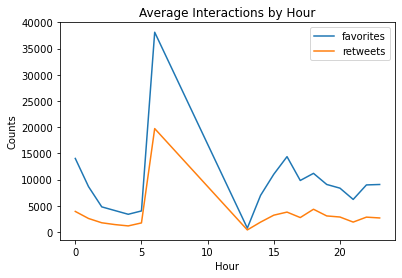

In [81]:
tweet_hour.plot(kind = 'line', y = ['favorites', 'retweets'],xlabel = 'Hour', ylabel = 'Counts', title = 'Average Interactions by Hour')

**Observation**
- Tweets within the hour of 6am have the highest favorite and retweet counts
- Tweets within the hour of 1pm have the lowest favorite and retweet counts

**Research Question 3 (Is a dog stage associated with more ratings)**

In [82]:
# group data by stage
dog_stage = archive_clean.groupby('stage').mean()
dog_stage

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,img_num,confidence_lvl,hour
stage,,,,,,,,
doggo,8.007910e+17,11.785714,10.0,19104.410714,6891.625000,1.267857,0.516533,11.428571
"doggo, pupper",7.688683e+17,11.800000,10.0,15664.200000,5482.400000,1.200000,0.819709,7.600000
floofer,7.665514e+17,12.000000,10.0,13206.000000,4968.714286,1.142857,0.609204,7.857143
pupper,7.220454e+17,10.976471,10.0,7551.288235,2420.911765,1.288235,0.583529,9.705882
puppo,8.124018e+17,12.000000,10.0,22657.181818,6958.500000,1.454545,0.637540,12.909091


**Observation**
- floofer and puppo have the highest ratings

### Conclusion

Key Takeaways
- Saluki breed has more engagement than the other breeds
- Tweets within the the hour of 6am are likely to have more interactions
- Floofer and Puppo dog stages are most likely to get more ratings

Limitations
- Authentication issues for a developer account results in download of text file made available by Udacity, containing retweet and favorite counts instead of querying Twitters API.

### Credit

I was able to complete this project by combining knowledge from Udacity Data Analyst Nano degree program, Python Documentation, Twitter API documentation, and online search in stackoverflow.